## Classification on PPR

In [5]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

# https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en

#### Data cleaning and transformation

due to massive size I'm going to use a sample

In [6]:
df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")
df = df.sample(50000)
df = df.reset_index()

In [7]:
df.head()

,index,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,175773,16/10/2015,"60 THE ELMS, RIDGEWOOD, SWORDS",Dublin,NaN,"254,625.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
1,561,19/01/2010,"Knocknagross, Bree, Co. Wexford",Wexford,NaN,"265,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,163712,22/07/2015,"10 CASTLE MANOR, NEWCASTLE, GREYSTONES",Wicklow,NaN,"249,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,349751,21/12/2018,"8 Green Avenue, Friary Walk, Callan",Kilkenny,NaN,"179,500.00",No,Yes,New Dwelling house /Apartment,NaN
4,230965,28/11/2016,"CLOONSKILL, LANKILL, WESTPORT",Mayo,NaN,"217,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [8]:
df.shape

(50000, 10)

In [9]:
df.isna().sum()


index                            0
Date of Sale (dd/mm/yyyy)        0
Address                          0
County                           0
Eircode                      42039
Price ()                        0
Not Full Market Price            0
VAT Exclusive                    0
Description of Property          0
Property Size Description    45592
dtype: int64

In [10]:
df.columns

Index(['index', 'Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [11]:
# extracting numeric values, getting rid of weird characters

df['Price'] = df['Price ()']
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

dropping eircode as too many null values

In [12]:
df = df[['Address', 'County','Price','Description of Property']]

In [13]:
df['Price'] = df['Price'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [15]:
df.County.unique()

array(['Dublin', 'Wexford', 'Wicklow', 'Kilkenny', 'Mayo', 'Westmeath',
       'Offaly', 'Meath', 'Clare', 'Galway', 'Kildare', 'Monaghan',
       'Louth', 'Tipperary', 'Waterford', 'Kerry', 'Cork', 'Donegal',
       'Limerick', 'Sligo', 'Laois', 'Carlow', 'Longford', 'Leitrim',
       'Cavan', 'Roscommon'], dtype=object)

#### Data transformation on address

as explained the main idea is to have only price data and tranaform saddress in multiple features using TFIDF

In [16]:
df['Address'].sample(20)

44446                      CAVANSHEATH BALLYFIN PORTLAOISE
1114                      CHURCH VIEW DR DRUMLISH LONGFORD
8935       CLUAIN UILINN SPANISH POINT ROAD MILTOWN MALBAY
12475     MARYBOROUGH CRESCENT BROOMVILLE DUBLIN ROAD P...
7983                  CÚL AITINN CLYBAUN ROAD KNOCKNACARRA
17796                       NO.  CARBERY TERRACE BALTIMORE
15682                        EDENTUBBER RAVENSDALE DUNDALK
10815                               ADELPHI QUAY WATERFORD
4188     APARTMENT NO.   LEVEL ELEVEN VANTAGE EAST  CEN...
49265                  AN GHAIRDIN KESHCARRIGAN CO LEITRIM
40888                            LORCAN PARK SANTRY DUBLIN
45093                         BEHENAGH KILBEHENNY LIMERICK
36992                   APT  TEMPLE GARDENS SANTRY DUBLIN 
35525                     ABBOT CLOSE ASKEATON CO LIMERICK
8336                           BULFIN RD INCHICORE DUBLIN 
8292                 KINGFISHER CLOSE FIONN LAOI POULAVONE
36064                       CASTLEFIELD MANOR BALLINA MA

In [17]:
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

In [18]:
df['Address'].sample(4)

7390                       MAIN STREET MOUNTRATH
37815                CORK ROAD NEWPORT TIPPERARY
29524     STATION HOUSE WEIR VIEW CASTLECOMER RD
12899          RIVERSIDE CAPPINILLY BORRISOLEIGH
Name: Address, dtype: object

In [19]:
df.head()

,Address,County,Price,Description of Property
0,THE ELMS RIDGEWOOD SWORDS,Dublin,254625.0,New Dwelling house /Apartment
1,KNOCKNAGROSS BREE CO. WEXFORD,Wexford,265000.0,Second-Hand Dwelling house /Apartment
2,CASTLE MANOR NEWCASTLE GREYSTONES,Wicklow,249000.0,Second-Hand Dwelling house /Apartment
3,GREEN AVENUE FRIARY WALK CALLAN,Kilkenny,179500.0,New Dwelling house /Apartment
4,CLOONSKILL LANKILL WESTPORT,Mayo,217500.0,Second-Hand Dwelling house /Apartment


In [20]:
#cleaning target variable

df['Description of Property'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('New Dwelling house /Apartment', 'New')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Nua','New')
df = df[df['Description of Property'] != 'Teach/?ras?n C?naithe Nua']
df = df.dropna()

#### Comparing prices on target variable

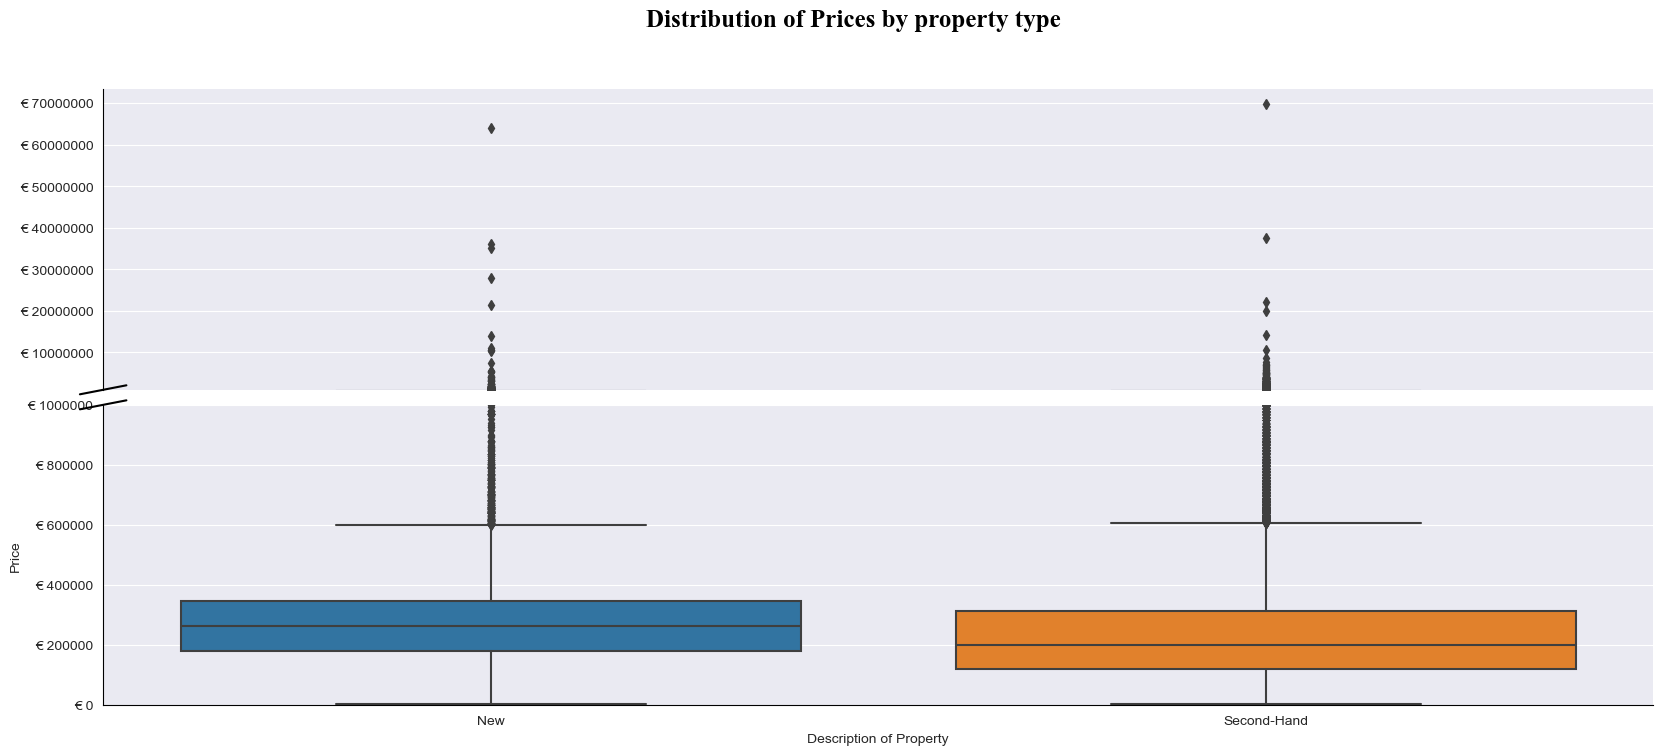

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Prices by property type',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_bottom)
b = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_top)
ax_top.set_ylim(bottom=1e6) 
ax_bottom.set_ylim(0,1e6)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_top.set(xlabel=None,ylabel=None)
b.ticklabel_format(style='plain', axis='y')
a.ticklabel_format(style='plain', axis='y')
ax_top.yaxis.set_major_formatter('€ {x:1.0f}')
ax_bottom.yaxis.set_major_formatter('€ {x:1.0f}')
plt.show()



#### comparing distributuions

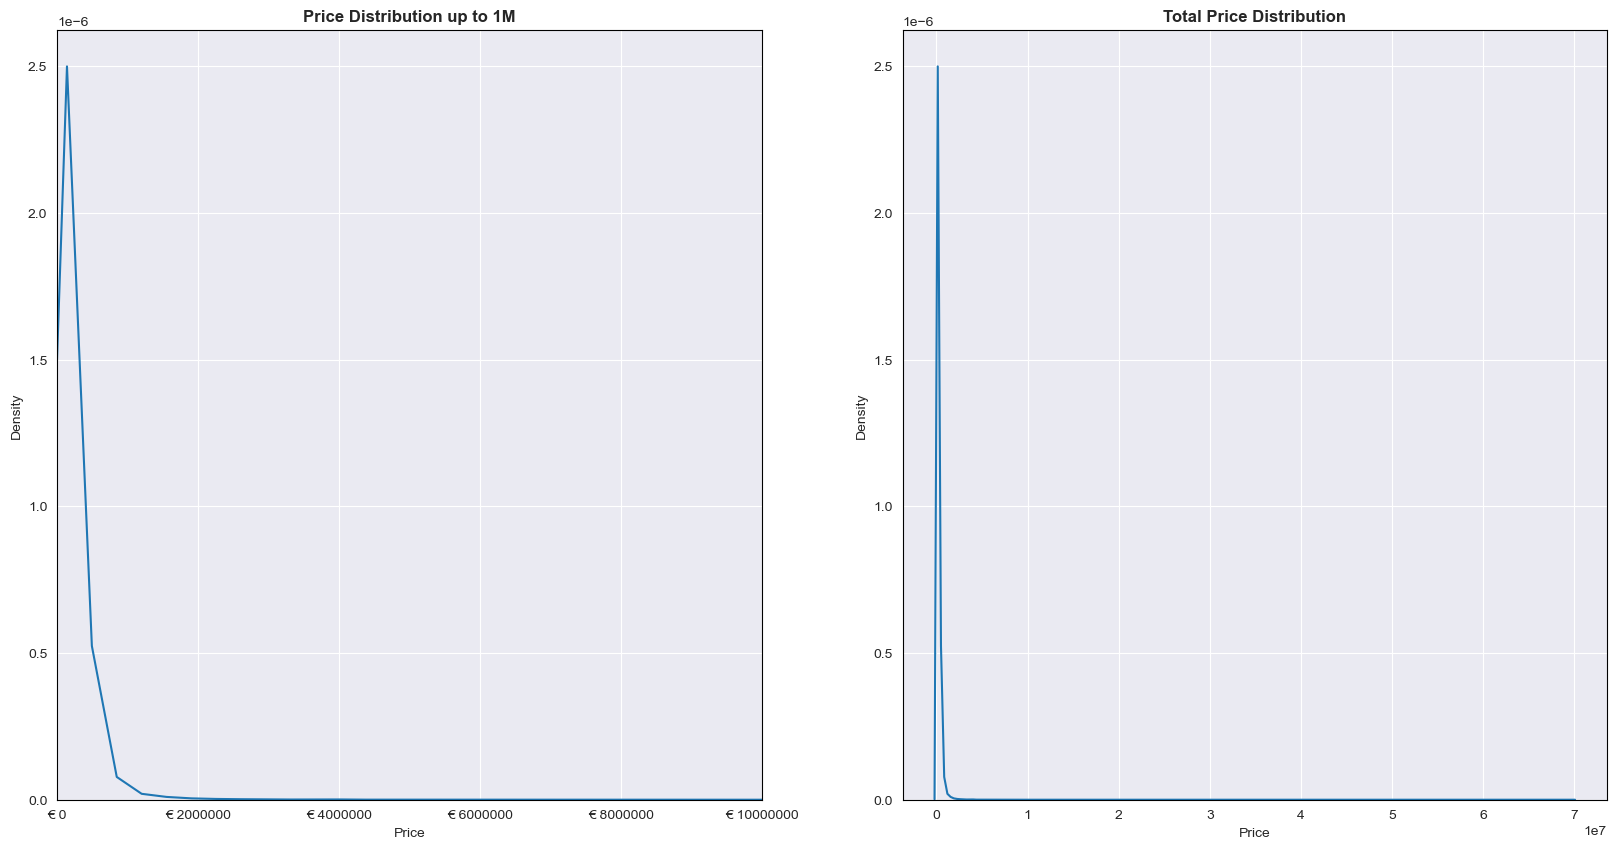

In [22]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))

plott = sns.kdeplot(df['Price'], ax=axes[0])
plott.set_title('Price Distribution up to 1M', fontweight='bold')
plott.ticklabel_format(style='plain', axis='x')
plott.xaxis.set_major_formatter('€ {x:1.0f}')
plott.set_xlim([0, 10000000])

plott2 = sns.kdeplot(df['Price'], ax=axes[1])
plott2.set_title('Total Price Distribution', fontweight='bold')

plt.show()


#### Normality test for the two categories (new - second hand)

In [23]:
from scipy.stats import shapiro,kstest,mannwhitneyu
for x in [df[df['Description of Property'] == 'Second-Hand'],df[df['Description of Property'] == 'New'] ]:
    stat, p = kstest(x['Price'],'norm')
    stat, p2 = shapiro(x['Price'])
    if p>0.05 or p2>0.05:
        print('accept H0')
    else:
        print('reject H0')

    

reject H0
reject H0


In [24]:
secon = df[df['Description of Property'] == 'Second-Hand']
new = df[df['Description of Property'] == 'New']

Non parametric Mann Whitney U test

H0: the medians of the two distributions are equal

H1: the medians of the two distributions are not equal

In [25]:
mannwhitneyu(secon['Price'],new['Price'])

MannwhitneyuResult(statistic=136366335.0, pvalue=1.4448496137125585e-199)

In [26]:
#cleaning up memory 
secon = []
new = []

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


#### TFIDF on Address

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text column
bag_of_words = vectorizer.fit_transform(df['Address'])
type(bag_of_words)

# Convert the bag_of_words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the desired columns with the bag_of_words DataFrame
df = pd.concat([df, bag_of_words_df], axis=1)

Robust Scaler on price attribute because of outliers

In [29]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

scaler = RobustScaler()

# Select the column you want to scale
column_to_scale = df['Price']

# Reshape the column to match the expected input shape of the scaler
reshaped_column = column_to_scale.values.reshape(-1, 1)

# Apply the scaling transformation to the reshaped column
scaled_column = scaler.fit_transform(reshaped_column)

# Create a new column in the DataFrame with the scaled values
df['Price'] = scaled_column

In [30]:
# cleaning memory
reshaped_column = []
scaled_column = []
bag_of_words_df = []
x = []
column_to_scale = []
y = []

In [31]:
df.drop('Address', axis=1, inplace=True)

In [32]:
df = pd.get_dummies(df, columns=['County'])

In [33]:
#final dataset
df.head()

,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abhainn,achill,adamstown,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,0.200126,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.252525,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.171717,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,-0.179293,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.012626,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(50000, 1028)

#### feature selection PCA Vs Feature importance

In [35]:
X = df.drop('Description of Property', axis=1)

In [36]:
y = df['Description of Property']

In [37]:
#clean memory
df = []

In [38]:
X = X.dropna()

In [39]:
from sklearn.decomposition import PCA

for comp in range(X.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.80:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(X)
cluster_df = Final_PCA.transform(X)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))


Using 1 components, we can explain 0.8473165982718885% of the variability in the original data.


#### Train test split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [41]:
Imp = {'value' : rf.feature_importances_, 'Feature': X.columns}
Imp = pd.DataFrame(Imp)
Imp.head()

,value,Feature
0,0.130568,Price
1,0.001734,abbey
2,0.000017,abbeyfeale
3,0.000093,abbeylands
4,0.000208,abbeyleix


#### Feature importance

0.3442329183376558


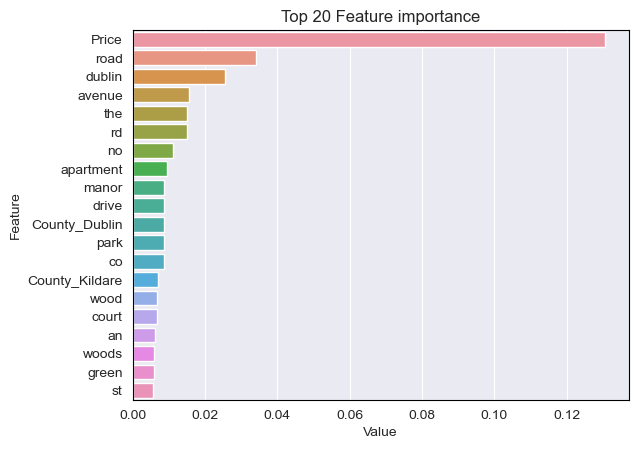

In [42]:
sorted_Imp = Imp.sort_values('value', ascending=False)

# Select the top 10 rows
top_20 = sorted_Imp.head(20)
print(top_20['value'].sum())
# Create the bar plot
sns.barplot(data=top_20, x='value', y='Feature')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature importance')
plt.show()

In [43]:
print(sorted_Imp)

            value    Feature
0    1.305679e-01      Price
815  3.415003e-02       road
362  2.558202e-02     dublin
55   1.562876e-02     avenue
917  1.512371e-02        the
..            ...        ...
387  3.237210e-06      emmet
405  2.814327e-06     father
995  1.949132e-06  woodstown
616  1.628950e-06       lord
163  9.124822e-07   brendans

[1027 rows x 2 columns]


Selecting number of feature to be taken in cosideration (cumulative 75%)

In [44]:
for x in range(1000):
    if sorted_Imp['value'].head(x).sum()>.75:
        print(x)
        break


242


In [45]:
Feature = sorted_Imp['Feature'].head(237)

In [46]:
Feature

0              Price
815             road
362           dublin
55            avenue
917              the
           ...      
634    manorhamilton
604         limekiln
481         hamilton
537            kerry
72      ballincollig
Name: Feature, Length: 237, dtype: object

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns.isin(Feature)], y, test_size=0.25, random_state=42)
X_train.shape

(37500, 237)

In [48]:
from sklearn.metrics import confusion_matrix as confucio
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, roc_auc_score,roc_curve

In [49]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Plotting class imbalance

<AxesSubplot:xlabel='Description of Property', ylabel='count'>

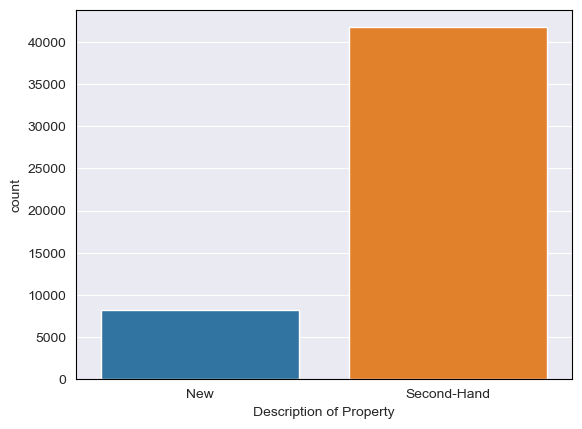

In [50]:
sns.countplot(x = y)

In [51]:
#applying undersampling

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= ros.fit_resample(X_train, y_train)

In [52]:
X_train_rus.shape

(12250, 237)

#### Modelling SVM

Optimal parameters:
 {'classification__C': 1, 'classification__kernel': 'rbf'}
Best mean cross-validated score:
 0.7781888566553199
Elapsed time: 704.60 seconds


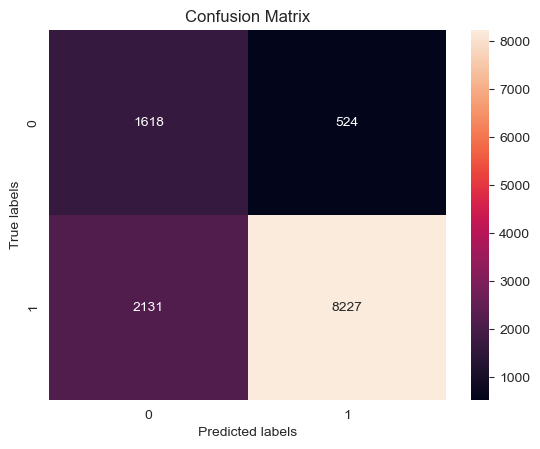

In [53]:
#svm
import time

start_time = time.time()
x = 'Svm'

model = Pipeline([('classification', SVC(random_state=1) )])

grid_params = {'classification__kernel': ['linear', 'poly', 'rbf'],
              'classification__C': [1,0.1,0.01]}

svm_clf = GridSearchCV(estimator=model, param_grid=grid_params, scoring='precision_weighted', cv=5,error_score='raise')

# fit the model
svm_clf.fit(X_train_rus,y_train_rus)

#best parameters,results from grid
svm_clf_best_parameters = svm_clf.best_params_
print("Optimal parameters:\n", svm_clf_best_parameters)
svm_clf_best_result = svm_clf.best_score_ 
print("Best mean cross-validated score:\n", svm_clf_best_result)

#metrics
y_pred= svm_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

#### Results

In [54]:
print('Precision: ' +  str(precision_score(y_test, y_pred, average='macro'))) 
print('recall: ' + str(recall_score(y_test, y_pred, average='macro')))
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred , average = 'macro')))


Precision: 0.6858514420742647
recall: 0.774817058187116
accuracy: 0.7876
F1 score: 0.7051863720036398
